# Capstone Project - Early Marriage is still true in Vietnam?

### By: Dexter Nguyen 
Date: May 28, 2020

## 1. Importing Libraries

In [117]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns

print('Libraries imported.')

Libraries imported.


## 2. Introduction: Business Problem

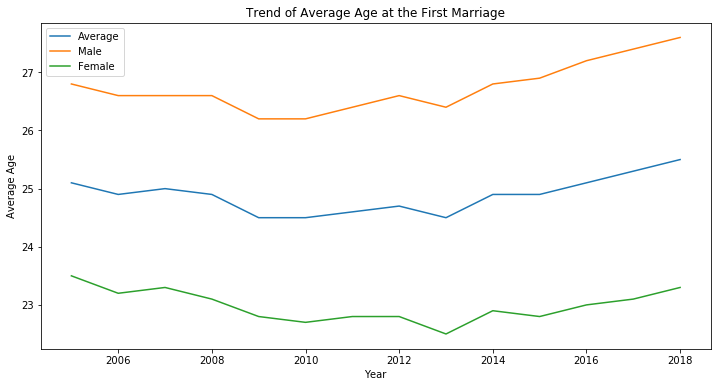

In [118]:
trenddata=pd.read_csv("Data11_Age_GetMarried_Trend.csv")
trenddata.set_index('Year', inplace=True)
trenddata.plot(kind='line', figsize=(12, 6)) # pass a tuple (x, y) size)
plt.title('Trend of Average Age at the First Marriage')
plt.ylabel('Average Age')
plt.xlabel('Year')
plt.show()

## 3. Data Analysis

### 3.1. Loading and Cleaning Marriage data

In [119]:
data=pd.read_csv("Data_Master.csv")
data.head()

Province/City  Area (km2)  Population (Thousand)  Density (/km2)  \
0        Ha Noi        3359                   7521            2239   
1     Vinh Phuc        1235                   1092             884   
2      Bac Ninh         823                   1248            1516   
3    Quang Ninh        6178                   1267             205   
4     Hai Duong        1668                   1808            1083   

   Immigration Rate  Migration Rate  Net Migration Rate  Age_First_Marriage  \
0               4.7             2.6                 2.1                26.2   
1               2.0             1.2                 0.8                23.7   
2              11.1             2.0                 9.1                24.0   
3               1.4             3.2                -1.8                25.7   
4               3.8             1.5                 2.3                25.3   

   Divoirce_Counts  Marriage_Counts_1stTime  Average_Children  Monthly_Income  \
0              963                    40990              2.07            6054   
1              273                     6646              2.48            3698   
2              251                     8315              2.66            5445   
3              419                     7384              2.22            4777   
4              415                    11775              2.59            3693   

   Percentage_In_LaborForce  Female/Male Ratio (%)  Cost_Of_Living_Index  \
0                      46.7                   97.3                100.00   
1                      22.0                   98.1                 92.62   
2                      27.9                   94.5                 94.95   
3                      35.1                  101.9                 96.12   
4                      17.6                   96.1                 92.87   

   Working_Hours/Week  Working_Hours/Month  
0                46.7                186.8  
1                45.0                180.0  
2                50.2                200.8  
3                48.0                192.0  
4                44.9                179.6

In [120]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in data.columns)

True

In [121]:
# View the information of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/City             63 non-null     object 
 1   Area (km2)                63 non-null     int64  
 2   Population (Thousand)     63 non-null     int64  
 3   Density (/km2)            63 non-null     int64  
 4   Immigration Rate          63 non-null     float64
 5   Migration Rate            63 non-null     float64
 6   Net Migration Rate        63 non-null     float64
 7   Age_First_Marriage        63 non-null     float64
 8   Divoirce_Counts           63 non-null     int64  
 9   Marriage_Counts_1stTime   63 non-null     int64  
 10  Average_Children          63 non-null     float64
 11  Monthly_Income            63 non-null     int64  
 12  Percentage_In_LaborForce  63 non-null     float64
 13  Female/Male Ratio (%)     63 non-null     float64
 14  Cost_Of_Livi

### 3.2. Data Exploratory

In [122]:
# Shape of the data frame
data.shape

(63, 17)

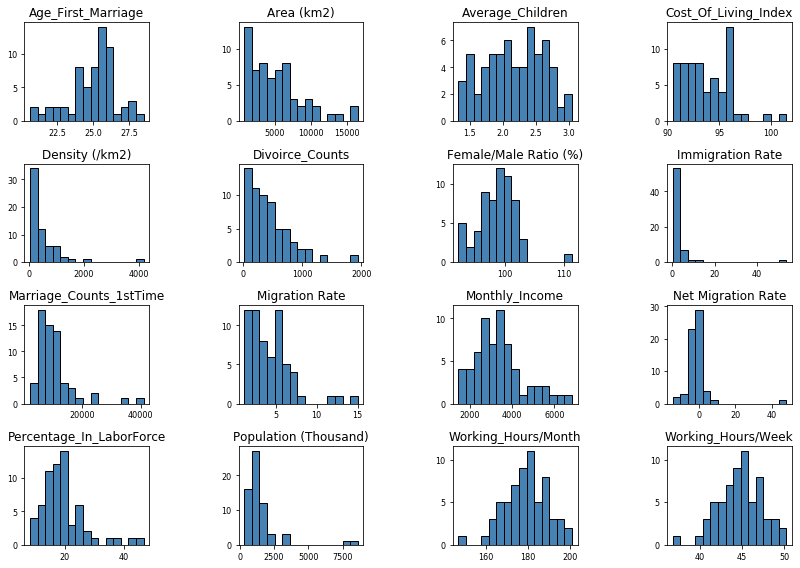

In [123]:
# Visualize the histograms of each variables
temp1=data.copy()

temp1.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))

In [124]:
# Review covariance between attribute (including all data points)
import matplotlib.pyplot as plt

temp2=data.copy()

corr_matrix=temp2.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

In [125]:
# Based on the abovementioned correlation analysis, we will move forward by dropping 8 variables: 
# Area (km2), 
# Population (Thousand), 
# Immigration Rate, 
# Migration Rate, 
# Marriage Counts of the first time, 
# Average Children, Costs of Living Index, and 
# Working Hours per month.
temp3 = temp2.drop(columns=['Migration Rate','Immigration Rate','Population (Thousand)','Area (km2)','Marriage_Counts_1stTime','Average_Children','Cost_Of_Living_Index','Working_Hours/Month'])
temp3.head()

Province/City  Density (/km2)  Net Migration Rate  Age_First_Marriage  \
0        Ha Noi            2239                 2.1                26.2   
1     Vinh Phuc             884                 0.8                23.7   
2      Bac Ninh            1516                 9.1                24.0   
3    Quang Ninh             205                -1.8                25.7   
4     Hai Duong            1083                 2.3                25.3   

   Divoirce_Counts  Monthly_Income  Percentage_In_LaborForce  \
0              963            6054                      46.7   
1              273            3698                      22.0   
2              251            5445                      27.9   
3              419            4777                      35.1   
4              415            3693                      17.6   

   Female/Male Ratio (%)  Working_Hours/Week  
0                   97.3                46.7  
1                   98.1                45.0  
2                   94.5                50.2  
3                  101.9                48.0  
4                   96.1                44.9

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


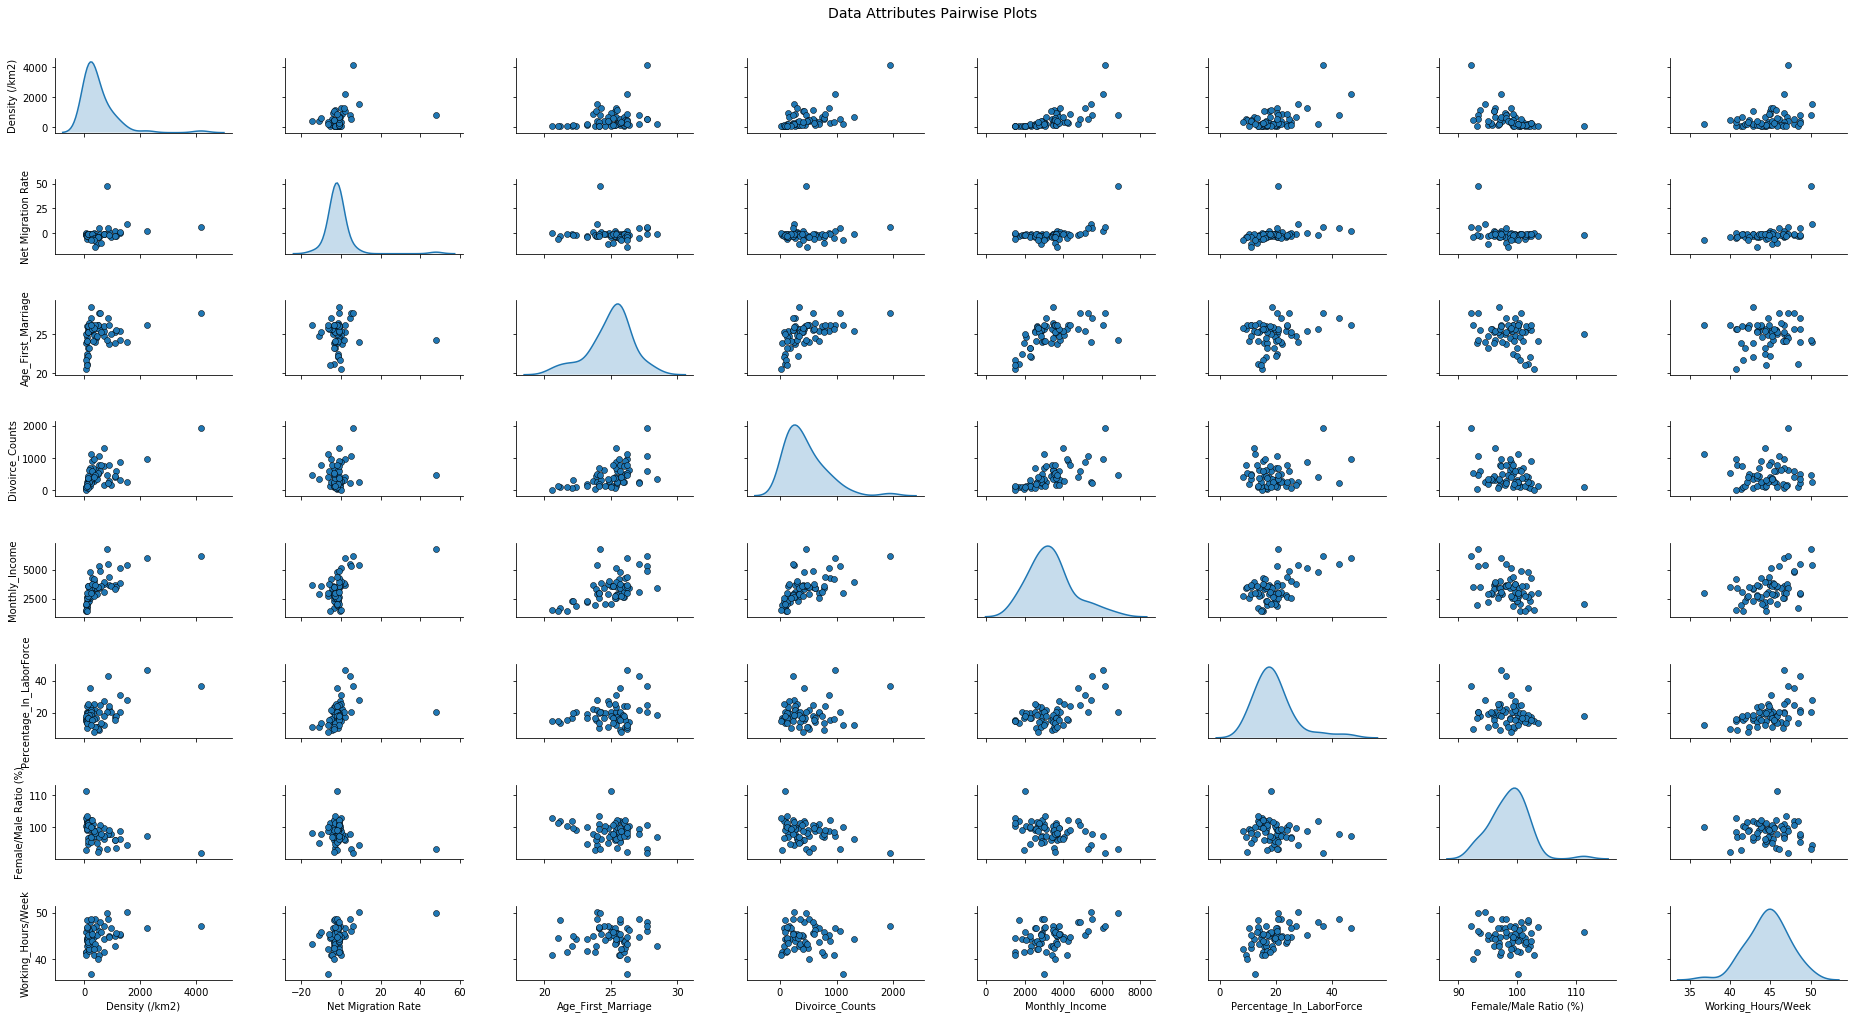

In [126]:
# Scatter Plots (all data points)
cols = temp3.columns
pp = sns.pairplot(temp3[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Data Attributes Pairwise Plots', fontsize=14)

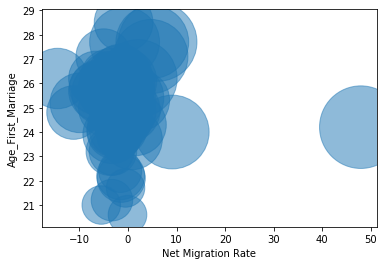

In [130]:
# Add a scatter plot showing the relationship between: Net Migration Rate vs Age_First_Marriage 
plt.scatter(temp3['Net Migration Rate'],temp3['Age_First_Marriage'],alpha=0.5, s=temp3['Monthly_Income'])
#plt.title('Germany price indices (2000-2018)')
plt.xlabel('Net Migration Rate')
plt.ylabel('Age_First_Marriage')
plt.show()

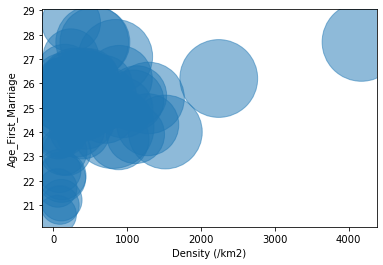

In [131]:
# Add a scatter plots showing the relationship between: Density (/km2) vs Age_First_Marriage
plt.scatter(temp3['Density (/km2)'],temp3['Age_First_Marriage'],alpha=0.5, s=temp3['Monthly_Income'])
#plt.title('Germany price indices (2000-2018)')
plt.xlabel('Density (/km2)')
plt.ylabel('Age_First_Marriage')
plt.show()

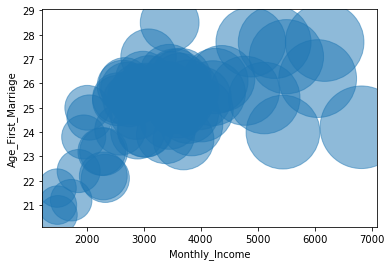

In [132]:
# Add a scatter plots showing the relationship between: Monthly_Income vs Age_First_Marriage 
plt.scatter(temp3['Monthly_Income'],temp3['Age_First_Marriage'],alpha=0.5, s=temp3['Monthly_Income'])
#plt.title('Germany price indices (2000-2018)')
plt.xlabel('Monthly_Income')
plt.ylabel('Age_First_Marriage')
plt.show()

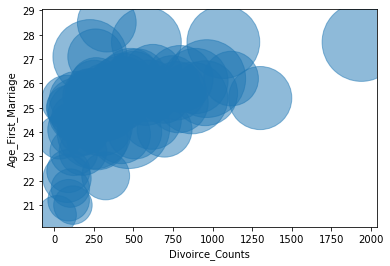

In [133]:
# Add a scatter plots showing the relationship between: Divorce_Counts vs Age_First_Marriage 
plt.scatter(temp3['Divoirce_Counts'],temp3['Age_First_Marriage'],alpha=0.5, s=temp3['Monthly_Income'])
#plt.title('Germany price indices (2000-2018)')
plt.xlabel('Divoirce_Counts')
plt.ylabel('Age_First_Marriage')
plt.show()

## 4. Clustering analysis

### 4.1. Normalizing over the standard deviation
Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [134]:
from sklearn.preprocessing import StandardScaler

temp4=temp3.copy()

X = temp4.values[:,1:]
X = np.nan_to_num(X)
Clus_data = StandardScaler().fit_transform(X)
Clus_data

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 2.76157101e+00,  4.69740632e-01,  7.43527833e-01,
         1.47388841e+00,  2.32971963e+00,  3.75163991e+00,
        -4.26820706e-01,  7.64938365e-01],
       [ 6.08621528e-01,  2.88867300e-01, -8.05488485e-01,
        -4.91868937e-01,  2.81300834e-01,  3.73600989e-01,
        -1.74038525e-01,  9.23201475e-02],
       [ 1.61280165e+00,  1.44367396e+00, -6.19606527e-01,
        -5.54545258e-01,  1.80022597e+00,  1.18050097e+00,
        -1.31155834e+00,  2.14974058e+00],
       [-4.70236549e-01, -7.28793646e-02,  4.33724569e-01,
        -7.59260775e-02,  1.21943491e+00,  2.16519248e+00,
         1.02667683e+00,  1.27929347e+00],
       [ 9.24811156e-01,  4.97567298e-01,  1.85881958e-01,
        -8.73217722e-02,  2.76953596e-01, -2.28154933e-01,
        -8.05993977e-01,  5.27543700e-02],
       [ 1.25212303e+00,  1.77560634e-01,  2.47842611e-01,
         1.20893851e+00,  1.51417768e+00,  1.61814164e+00,
         1.10341428e-01,  1.31885925e-01],
       [ 1.23464521e+00,  3.862606

### 4.2. Modeling

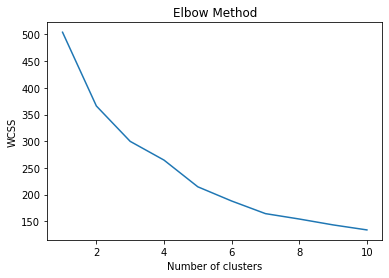

In [139]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    kmeans.fit(Clus_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [140]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_data)
labels = k_means.labels_
print(labels)

[2 1 2 1 1 2 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 0 0 1 0 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [141]:
# We assign the labels to each row in dataframe.
temp4["Cluster"] = labels
temp4.head(5)

Province/City  Density (/km2)  Net Migration Rate  Age_First_Marriage  \
0        Ha Noi            2239                 2.1                26.2   
1     Vinh Phuc             884                 0.8                23.7   
2      Bac Ninh            1516                 9.1                24.0   
3    Quang Ninh             205                -1.8                25.7   
4     Hai Duong            1083                 2.3                25.3   

   Divoirce_Counts  Monthly_Income  Percentage_In_LaborForce  \
0              963            6054                      46.7   
1              273            3698                      22.0   
2              251            5445                      27.9   
3              419            4777                      35.1   
4              415            3693                      17.6   

   Female/Male Ratio (%)  Working_Hours/Week  Cluster  
0                   97.3                46.7        2  
1                   98.1                45.0        1  
2                   94.5                50.2        2  
3                  101.9                48.0        1  
4                   96.1                44.9        1

### 4.3. Insights

In [142]:
# We can easily check the centroid values by averaging the features in each cluster
temp4.groupby('Cluster').mean()

Density (/km2)  Net Migration Rate  Age_First_Marriage  \
Cluster                                                           
0             95.857143           -2.107143           22.800000   
1            448.404762           -2.995238           25.559524   
2           1626.428571           10.700000           26.042857   

         Divoirce_Counts  Monthly_Income  Percentage_In_LaborForce  \
Cluster                                                              
0             121.642857     2058.285714                 16.400000   
1             490.142857     3413.214286                 18.052381   
2             826.714286     5774.285714                 32.300000   

         Female/Male Ratio (%)  Working_Hours/Week  
Cluster                                             
0                   100.757143           44.157143  
1                    98.488095           44.478571  
2                    95.414286           47.714286

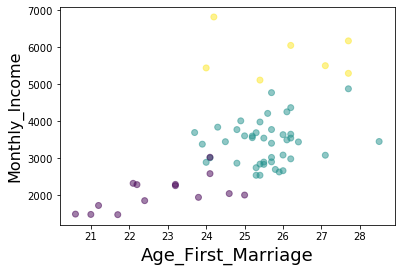

In [143]:
# Now, lets look at the distribution of customers based on Age at the first marriage and Monthly Income

plt.scatter(X[:, 2], X[:, 4], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age_First_Marriage', fontsize=18)
plt.ylabel('Monthly_Income', fontsize=16)

plt.show()

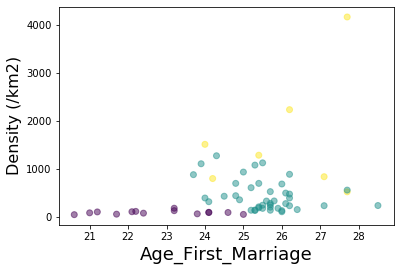

In [144]:
# Now, lets look at the distribution of customers based on Age at the first marriage and Density (km2)

plt.scatter(X[:, 2], X[:, 0], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age_First_Marriage', fontsize=18)
plt.ylabel('Density (/km2)', fontsize=16)

plt.show()

In [145]:
# Visualize the clusters on map
temp5=temp4.copy()

temp5['Cluster'] = temp5['Cluster'].astype('category')
temp5 = temp5.rename(columns={"Province/City": "province"})
temp5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   province                  63 non-null     object  
 1   Density (/km2)            63 non-null     int64   
 2   Net Migration Rate        63 non-null     float64 
 3   Age_First_Marriage        63 non-null     float64 
 4   Divoirce_Counts           63 non-null     int64   
 5   Monthly_Income            63 non-null     int64   
 6   Percentage_In_LaborForce  63 non-null     float64 
 7   Female/Male Ratio (%)     63 non-null     float64 
 8   Working_Hours/Week        63 non-null     float64 
 9   Cluster                   63 non-null     category
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 4.7+ KB


In [146]:
# Change city name to match json file
temp5['json_name']=temp4['Province/City']
temp5.loc[temp5.province[temp5.province == 'Ho Chi Minh City'].index.tolist(),'json_name']='TP. Ho Chi Minh'
temp5.loc[temp5.province[temp5.province == 'Thua Thien Hue'].index.tolist(),'json_name']='Thua Thien - Hue'
temp5.loc[temp5.province[temp5.province == 'Ba Ria Vung Tau'].index.tolist(),'json_name']='Ba Ria - Vung Tau'
temp5.loc[temp5.province[temp5.province == 'Lang son'].index.tolist(),'json_name']='Lang Son'
temp5.loc[temp5.province[temp5.province == 'Dac Lak'].index.tolist(),'json_name']='Dak Lak'
temp5.head(5)

province  Density (/km2)  Net Migration Rate  Age_First_Marriage  \
0      Ha Noi            2239                 2.1                26.2   
1   Vinh Phuc             884                 0.8                23.7   
2    Bac Ninh            1516                 9.1                24.0   
3  Quang Ninh             205                -1.8                25.7   
4   Hai Duong            1083                 2.3                25.3   

   Divoirce_Counts  Monthly_Income  Percentage_In_LaborForce  \
0              963            6054                      46.7   
1              273            3698                      22.0   
2              251            5445                      27.9   
3              419            4777                      35.1   
4              415            3693                      17.6   

   Female/Male Ratio (%)  Working_Hours/Week Cluster   json_name  
0                   97.3                46.7       2      Ha Noi  
1                   98.1                45.0       1   Vinh Phuc  
2                   94.5                50.2       2    Bac Ninh  
3                  101.9                48.0       1  Quang Ninh  
4                   96.1                44.9       1   Hai Duong

In [147]:
import seaborn as sns
import folium
import os
import json
import requests

#address= 'Vietnam'
#geolocator = Nominatim()
#location = geolocator.geocode(address)

vn=folium.Map(
    location=[13.2904027, 108.4265113],
    zoom_start=5)

url = 'https://data.opendevelopmentmekong.net/dataset/999c96d8-fae0-4b82-9a2b-e481f6f50e12/resource/2818c2c5-e9c3-440b-a9b8-3029d7298065/download/diaphantinhenglish.geojson'
vn_geo=json.loads(requests.get(url).text)

vn.choropleth(
    geo_data=vn_geo,
    data=temp5,
    columns=['json_name','Cluster'],
    key_on='feature.properties.Name',
    fill_color='OrRd', 
    fill_opacity=0.75, 
    line_opacity=0.2,
    legend_name='Cluster',
    threshold_scale=[0, 1, 2, 3])
vn

In [148]:
# Examine the first cluster
temp5[temp5['Cluster'] == 0]

province  Density (/km2)  Net Migration Rate  Age_First_Marriage  \
11     Ha Giang             107                -3.3                21.2   
12     Cao Bang              81                -1.6                22.4   
13      Bac Kan              67                -1.8                23.8   
14  Tuyen Quang             133                -3.1                23.2   
15      Lao Cai             111                -1.4                22.1   
16      Yen Bai             118                -1.5                22.2   
18     Lang son              95                -0.8                24.6   
21    Dien Bien              60                -0.5                21.7   
22     Lai Chau              50                -0.1                20.6   
23       Son La              88                -5.5                21.0   
24     Hoa Binh             184                -3.7                23.2   
39      Kon Tum              55                -2.0                25.0   
40      Gia Lai              94                -1.4                24.1   
42     Dak Nong              99                -2.8                24.1   

    Divoirce_Counts  Monthly_Income  Percentage_In_LaborForce  \
11               91            1725                      13.4   
12               89            1856                      20.2   
13               35            1945                      16.8   
14              181            2261                      19.2   
15               81            2324                      16.5   
16              325            2289                      20.0   
18              126            2047                      19.6   
21              102            1477                      15.4   
22               18            1492                      14.9   
23              118            1483                      14.6   
24              124            2295                      16.8   
39               92            2007                      18.2   
40              188            2586                      10.4   
42              133            3029                      13.6   

    Female/Male Ratio (%)  Working_Hours/Week Cluster    json_name  
11                  101.9                48.4       0     Ha Giang  
12                   99.2                44.3       0     Cao Bang  
13                   93.1                41.4       0      Bac Kan  
14                   95.0                44.3       0  Tuyen Quang  
15                  102.1                42.9       0      Lao Cai  
16                   99.9                44.9       0      Yen Bai  
18                  100.5                44.0       0     Lang Son  
21                  100.4                41.6       0    Dien Bien  
22                  102.8                40.8       0     Lai Chau  
23                  101.4                44.5       0       Son La  
24                  100.0                41.8       0     Hoa Binh  
39                  111.3                45.8       0      Kon Tum  
40                   99.5                46.6       0      Gia Lai  
42                  103.5                46.9       0     Dak Nong

In [149]:
# Examine the second cluster
temp5[temp5['Cluster'] == 1]

province  Density (/km2)  Net Migration Rate  Age_First_Marriage  \
1         Vinh Phuc             884                 0.8                23.7   
3        Quang Ninh             205                -1.8                25.7   
4         Hai Duong            1083                 2.3                25.3   
6          Hung Yen            1278                 1.5                24.3   
7         Thai Binh            1130                -2.9                25.5   
8            Ha Nam             938                -4.0                25.0   
9          Nam Dinh            1111                -3.3                23.9   
10        Ninh Binh             702                -0.6                24.8   
17      Thai Nguyen             360                 0.1                24.9   
19        Bac Giang             434                -1.2                24.5   
20          Phu Tho             397                -2.9                24.0   
25        Thanh Hoa             320                -2.3                24.1   
26          Nghe An             192                -3.6                25.4   
27          Ha Tinh             213                -3.6                25.4   
28       Quang Binh             111                -3.1                26.0   
29        Quang Tri             136                -2.6                25.3   
30   Thua Thien Hue             237                -5.0                27.1   
32        Quang Nam             142                -1.2                25.7   
33       Quang Ngai             247                -3.3                25.5   
34        Binh Dinh             253                -1.7                25.7   
35          Phu Yen             181                -3.4                25.5   
36        Khanh Hoa             240                -0.9                28.5   
37       Ninh Thuan             182                -1.0                25.9   
38       Binh Thuan             156                -1.6                26.4   
41          Dac Lak             147                -2.8                25.3   
43         Lam Dong             134                -0.7                26.0   
44       Binh Phuoc             142                -0.7                25.2   
45         Tay Ninh             280                -0.8                26.1   
48  Ba Ria Vung Tau             562                -0.7                27.7   
50          Long An             334                -4.9                25.6   
51       Tien Giang             702                -0.8                25.4   
52          Ben Tre             530                -4.3                25.7   
53         Tra Vinh             445               -11.2                24.8   
54        Vinh Long             689                -0.8                26.0   
55        Dong Thap             500                -3.7                26.1   
56         An Giang             612                -9.9                25.2   
57       Kien Giang             285                -5.9                25.7   
58          Can Tho             891                -1.8                26.2   
59        Hau Giang             479                -3.7                26.2   
60        Soc Trang             397               -14.5                26.2   
61         Bac Lieu             336                -6.7                25.8   
62           Ca Mau             236                -6.6                26.2   

    Divoirce_Counts  Monthly_Income  Percentage_In_LaborForce  \
1               273            3698                      22.0   
3               419            4777                      35.1   
4               415            3693                      17.6   
6               300            3843                      20.3   
7               579            3547                      18.1   
8               145            3608                      20.3   
9               424            3383                      15.7   
10              157            3777                      27.0   
17              296         

In [150]:
# Examine the third cluster
temp5[temp5['Cluster'] == 2]

province  Density (/km2)  Net Migration Rate  Age_First_Marriage  \
0             Ha Noi            2239                 2.1                26.2   
2           Bac Ninh            1516                 9.1                24.0   
5          Hai Phong            1289                 0.0                25.4   
31           Da Nang             841                 4.7                27.1   
46        Binh Duong             803                47.9                24.2   
47          Dong Nai             526                 5.0                27.7   
49  Ho Chi Minh City            4171                 6.1                27.7   

    Divoirce_Counts  Monthly_Income  Percentage_In_LaborForce  \
0               963            6054                      46.7   
2               251            5445                      27.9   
5               870            5116                      31.1   
31              226            5506                      42.6   
46              469            6823                      20.7   
47             1068            5299                      20.2   
49             1940            6177                      36.9   

    Female/Male Ratio (%)  Working_Hours/Week Cluster        json_name  
0                    97.3                46.7       2           Ha Noi  
2                    94.5                50.2       2         Bac Ninh  
5                    99.0                45.1       2        Hai Phong  
31                   98.1                48.7       2          Da Nang  
46                   93.4                50.0       2       Binh Duong  
47                   93.4                46.1       2         Dong Nai  
49                   92.2                47.2       2  TP. Ho Chi Minh